#### Purpose: Over the past year Credit One has taken notice of an increase in the number of customers who have defaulted on loans. This is despite the current classification and customer selection models. The objective of this urgent project is to examine current customer demographics to better understand traits that relate to whether or not a customer is likely to default on their credit obligations. Thus,  in this project section an in depth exploratory study of Credit One's customer data is performed. This study includes:  data screening, processing, & cleaning, and exploratory data analysis in which factors that may affect the customer account status are visualized.

#### The Data
#### The available data was made available by Tamkang University, Taiwan. This data includes 30000 records containing customer loan information. The information includes: Credit Limit provided to customer, Gender, Education, Marital status, Age, 6 month payment history, 6 month bill statement amounts, 6 month amount of payment made and Default status

In [1]:
import pandas as pd
from pandas import Series, DataFrame
# import matplotlib.pyplot for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
creditD=pd.read_csv('credit.csv')

In [3]:
creditD.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
# aquire descriptive statistics about the data 
creditD.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
# use the index object in pandas to make sure we know the column names in the
#dataframe
header = creditD.dtypes.index
print(header)

Index(['Unnamed: 0', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [5]:
# drop Unnamed: 0 feature form data frame
creditD = creditD.drop(['Unnamed: 0'], axis = 1)
creditD.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# information about the data set
creditD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [9]:
# rename column so no spaces between words
creditD.rename(columns = {'default payment next month':'default_payment_Oct_2005'}, inplace= True)
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
# Determine the number of customers in each educatio level
creditD.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

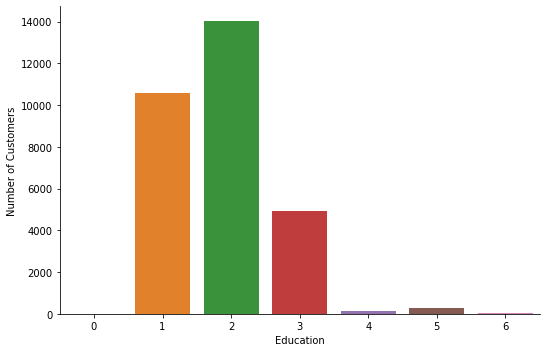

In [12]:
# Use seaborn to plot the customer count in each education class ( 1= graduate school, 2= college, 
# 3= highschool, 0,4-6 = other)
fg1=sns.catplot('EDUCATION', data=creditD, kind='count', aspect=1.5)
fg1.set_xlabels('Education')
fg1.set_ylabels('Number of Customers')

### The majority of Credit One's customers are University and College Education Levels

In [13]:
# Determine the number of customers by gender, 1= Male, 2 = Female.
creditD.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

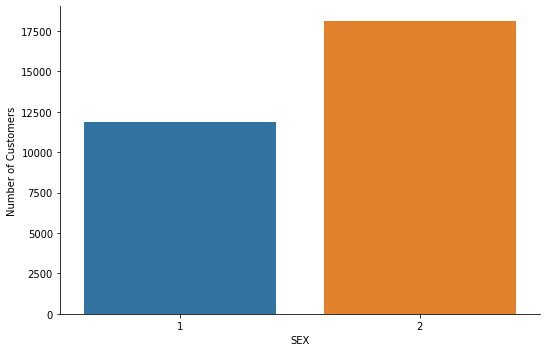

In [14]:
# Use seaborn to plot the number of customers by gender, 1= Male, 2= Female
fg2=sns.catplot('SEX', data=creditD,kind='count',aspect=1.5)
fg2.set_xlabels('SEX')
fg2.set_ylabels('Number of Customers')

#### There are approximatly 50,000 more female than male customers 

In [18]:
#Determine the number of men and women in each education level
creditD.groupby(['SEX','EDUCATION'])['EDUCATION'].count()

SEX  EDUCATION
1    0               8
     1            4354
     2            5374
     3            1990
     4              42
     5              95
     6              25
2    0               6
     1            6231
     2            8656
     3            2927
     4              81
     5             185
     6              26
Name: EDUCATION, dtype: int64

fg3


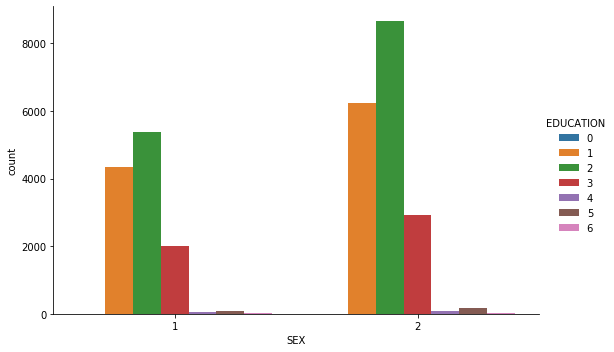

In [24]:
#use seaborn to group by and plot sex and education
fg3=sns.catplot('SEX', data=creditD,hue='EDUCATION', kind='count', aspect=1.5)
fg3.set_xlabels('SEX')
print('fg3')


fg4


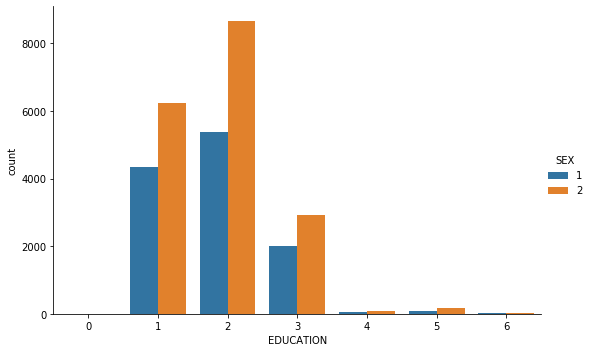

In [26]:
#use seaborn to group by and plot sex and education
fg4=sns.catplot('EDUCATION', data=creditD,hue='SEX', kind='count', aspect=1.5)
fg4.set_xlabels('EDUCATION')
print('fg4')

#### Fig3 and Fig4 both represent plots of customers gener and education level grouped by gender. 1= male, 2= female.  As observed in a previous chart there are more females than males in the customer data.

In [37]:
#determine the number of cutomers who defaulted in Oct 2005, by sex and education.
creditD.pivot_table('default_payment_Oct_2005','EDUCATION','SEX', aggfunc=np.sum, margins=True)


SEX,1,2,All
EDUCATION,,,
0,0,0,0
1,906,1130,2036
2,1408,1922,3330
3,545,692,1237
4,4,3,7
5,6,12,18
6,4,4,8
All,2873,3763,6636


In [39]:
#Determine the number of customers by education level and Marriage status level
creditD.groupby(['EDUCATION','MARRIAGE'])['MARRIAGE'].count()

EDUCATION  MARRIAGE
0          1              4
           2             10
1          0              4
           1           3722
           2           6809
           3             50
2          0              6
           1           6842
           2           7020
           3            162
3          0             44
           1           2861
           2           1909
           3            103
4          1             52
           2             68
           3              3
5          1            150
           2            127
           3              3
6          1             28
           2             21
           3              2
Name: MARRIAGE, dtype: int64

fg5


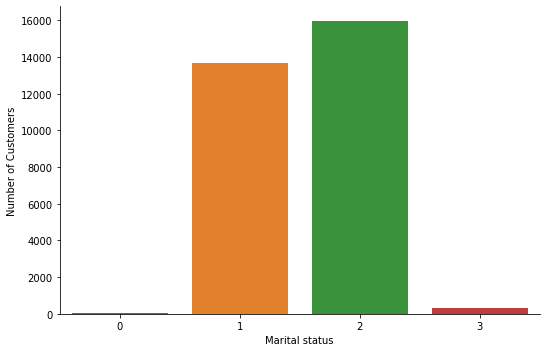

In [43]:
# Use seaborn to plot the customer count in each Marriage class ( 1= married, 2= single, 
# 3= divorce, 0 = other)
fg5=sns.catplot('MARRIAGE', data=creditD, kind='count', aspect=1.5)
fg5.set_xlabels('Marital status')
fg5.set_ylabels('Number of Customers')
print('fg5')

In [41]:
# Determine the number of customers by Marital status, 1= Married, 2 = single, 3= divorced, 0 = other.
creditD.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

fg6


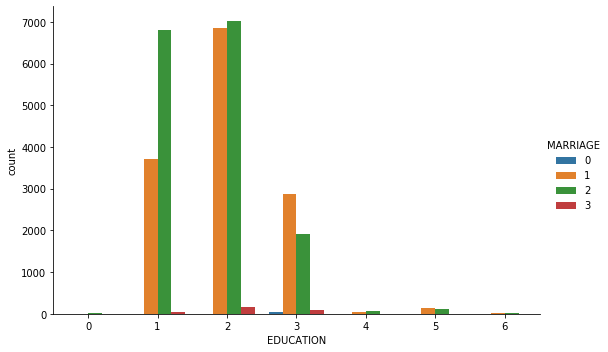

In [50]:
#use seaborn to group by and plot Education and Marrital status
fg6=sns.catplot('EDUCATION', data=creditD,hue='MARRIAGE', kind='count', aspect=1.5)
fg5.set_xlabels('EDUCATION')
print('fg6')

In [51]:
#determine the number of cutomers who defaulted in Oct 2005, by Marriage and education.
creditD.pivot_table('default_payment_Oct_2005','EDUCATION','MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE,0,1,2,3,All
EDUCATION,,,,,
0,NaN,0.0,0.0,NaN,0
1,0.0,769.0,1254.0,13.0,2036
2,1.0,1666.0,1619.0,44.0,3330
3,4.0,754.0,452.0,27.0,1237
4,NaN,3.0,4.0,0.0,7
5,NaN,9.0,9.0,0.0,18
6,NaN,5.0,3.0,0.0,8
All,5.0,3206.0,3341.0,84.0,6636


In [54]:
# define those in default and not in default in October 2005
default = creditD[creditD['default_payment_Oct_2005']==1]
not_default= creditD[creditD['default_payment_Oct_2005']==0]

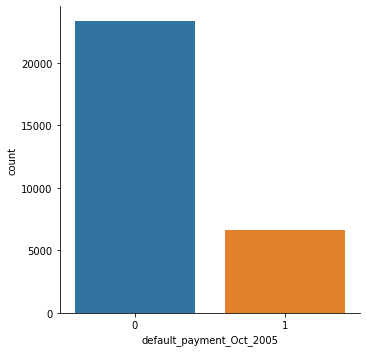

In [55]:
#catplot those who are in defoult vs those not in defoult Oct. 2005
sns.catplot('default_payment_Oct_2005', data= creditD, kind='count')

In [59]:
#total number of customer who default and not defaualt in October 2005
len(default)

6636

In [60]:
len(not_default)

23364

In [83]:
# Customers in default and not in default groped by education, marrital status and sex
table = pd.crosstab(index=[creditD.default_payment_Oct_2005, creditD.EDUCATION,creditD.MARRIAGE], columns=[creditD.SEX])

In [84]:
table.unstack()

SEX                                    1                           2          \
MARRIAGE                               0       1       2     3     0       1   
default_payment_Oct_2005 EDUCATION                                             
0                        0           NaN     2.0     6.0   NaN   NaN     2.0   
                         1           1.0  1300.0  2127.0  20.0   3.0  1653.0   
                         2           1.0  1727.0  2194.0  44.0   4.0  3449.0   
                         3          10.0   745.0   665.0  25.0  30.0  1362.0   
                         4           NaN    16.0    21.0   1.0   NaN    33.0   
                         5           NaN    44.0    44.0   1.0   NaN    97.0   
                         6           NaN    10.0    11.0   0.0   NaN    13.0   
1                        1           NaN   390.0   506.0  10.0   NaN   379.0   
                         2           0.0   643.0   746.0  19.0   1.0  1023.0   
                         3           2.0   303.0   229.0  11.0   2.0   451.0   
                         4           NaN     2.0     2.0   NaN   NaN     1.0   
                         5           NaN     4.0     2.0   NaN   NaN     5.0   
                         6           NaN     4.0     0.0   NaN   NaN     1.0   

SEX                                               
MARRIAGE                                 2     3  
default_payment_Oct_2005 EDUCATION                
0                        0             4.0   NaN  
                         1          3428.0  17.0  
                         2          3207.0  74.0  
                         3           792.0  51.0  
                         4            43.0   2.0  
                         5            74.0   2.0  
                         6             7.0   2.0  
1                        1           748.0   3.0  
                         2           873.0  25.0  
                         3           223.0  16.0  
                         4             2.0   NaN  
                         5             7.0   NaN  
                         6             3.0   NaN

In [90]:
table.columns, table.index

(Int64Index([1, 2], dtype='int64', name='SEX'),
 MultiIndex(levels=[[0, 1], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3]],
            codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6], [1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 1, 2, 1, 2]],
            names=['default_payment_Oct_2005', 'EDUCATION', 'MARRIAGE']))

In [87]:
creditD['SEX']=creditD.SEX.astype(int)

In [88]:
creditD.dtypes

LIMIT_BAL                   int64
SEX                         int32
EDUCATION                   int64
MARRIAGE                    int64
AGE                         int64
PAY_0                       int64
PAY_2                       int64
PAY_3                       int64
PAY_4                       int64
PAY_5                       int64
PAY_6                       int64
BILL_AMT1                   int64
BILL_AMT2                   int64
BILL_AMT3                   int64
BILL_AMT4                   int64
BILL_AMT5                   int64
BILL_AMT6                   int64
PAY_AMT1                    int64
PAY_AMT2                    int64
PAY_AMT3                    int64
PAY_AMT4                    int64
PAY_AMT5                    int64
PAY_AMT6                    int64
default_payment_Oct_2005    int64
dtype: object

### Look at customer age next

In [95]:
print('The average and median age of customers are %0.f and %0.f years old, respectively'%(creditD.AGE.mean(),creditD.AGE.median()))

The average and median age of customers are 35 and 34 years old, respectively


In [96]:
creditD.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [98]:
#Drop missing values for the records in which age of customer is missing
age=creditD['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Credit ONE's Customer Ages")

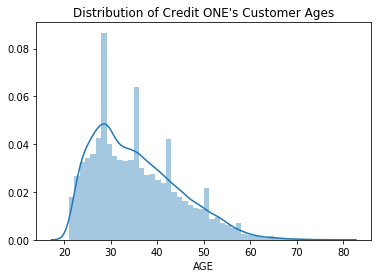

In [100]:
# plot the age distribution with an overlay of density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Credit ONE's Customer Ages")

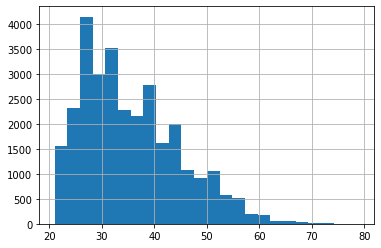

In [103]:
#plot the distribution of age using histogram
creditD['AGE'].hist(bins=24)

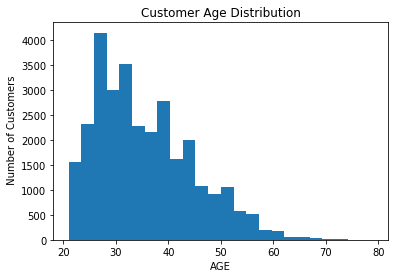

In [107]:
plt.hist(creditD['AGE'],bins=24)
plt.title("Customer Age Distribution")
plt.xlabel("AGE")
plt.ylabel(" Number of Customers")
plt.show()

In [111]:
#create a function to define those who are young (less than 30)
def male_female_young(customer):
    AGE, SEX = customer
    if AGE<30:return'young'
    if SEX<2:return'male'
    if SEX>1:return'female'

In [114]:
# add a column to creditD describing 'person'
creditD['person']=creditD[['AGE','SEX']].apply(male_female_young, axis=1)

In [115]:
# confirm the addtion of the person attribute by looking at the first 10 rows
creditD[:10]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,young
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,young
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,female
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,female
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,male
5,50000,1,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,male
6,500000,1,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,young
7,100000,2,2,2,23,0,-1,-1,0,0,...,-159,567,380,601,0,581,1687,1542,0,young
8,140000,2,3,1,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,young
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,0,male


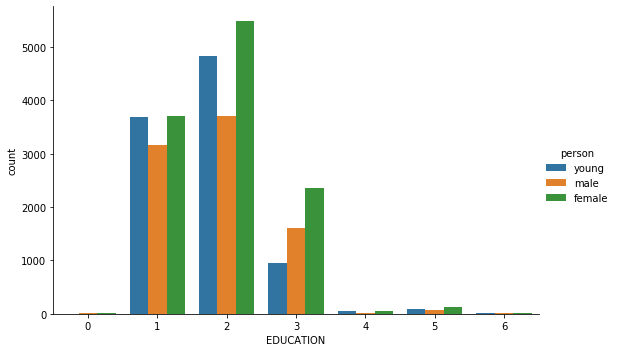

In [118]:
#create catplot for customers splitt into sex,young,and education
sns.catplot('EDUCATION',data = creditD, kind='count', hue='person', order=[0,1,2,3,4,5,6], hue_order = ['young', 'male','female'],aspect=1.5)

In [119]:
#Determine the number of men, women,and young customers
creditD['person'].value_counts()

female    11775
young      9618
male       8607
Name: person, dtype: int64

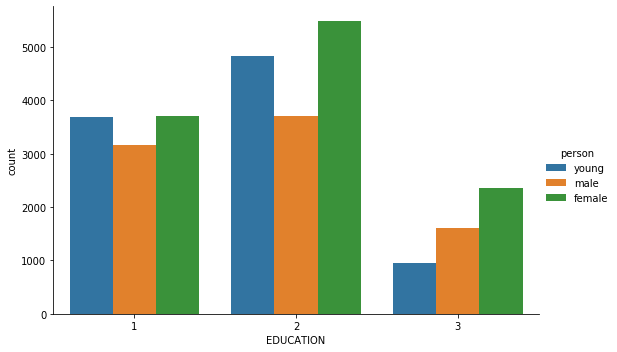

In [120]:
# create catplot for customers split into sex,young and graduate school, college, and high school
sns.catplot('EDUCATION',data = creditD, kind='count', hue='person', order=[1,2,3], hue_order = ['young', 'male','female'],aspect=1.5)

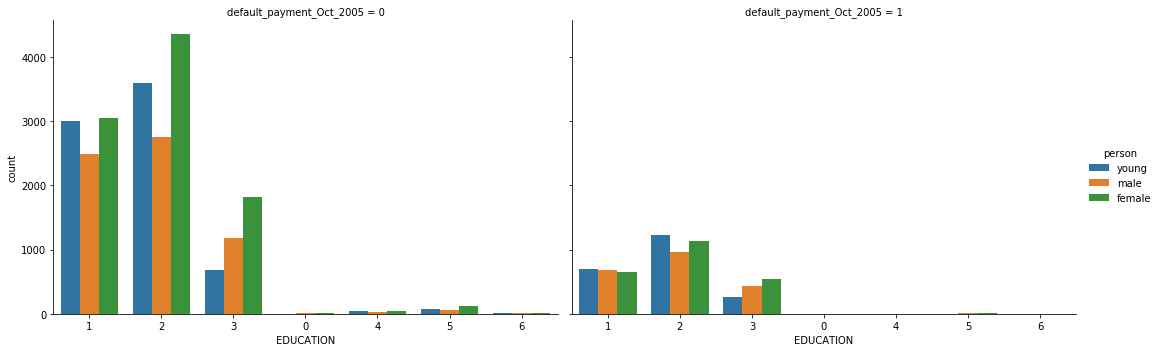

In [123]:
# split the customers into default or not default in Oct 2005
sns.factorplot('EDUCATION', data=creditD, kind='count', hue = 'person', col='default_payment_Oct_2005', order=[1,2,3,0,4,5,6],
              hue_order=['young','male', 'female'], aspect=1.5, height=5)

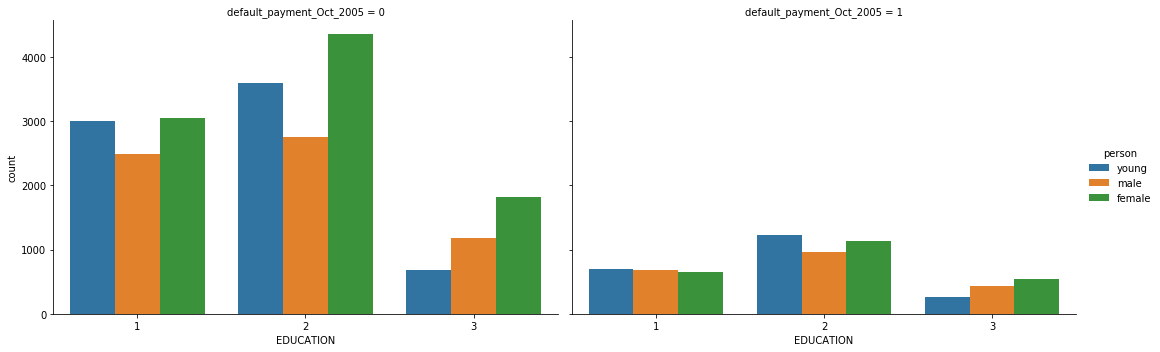

In [124]:
# split the customers into default or not default in Oct 2005
sns.factorplot('EDUCATION', data=creditD, kind='count', hue = 'person', col='default_payment_Oct_2005', order=[1,2,3],
              hue_order=['young','male', 'female'], aspect=1.5, height=5)

### There are more people in the college(2) education catergory that default on their Oct. 2005 payment than in grad school (1) and highschool (3) catergories. From the college education category there are more young adults that default on their Oct 2005 payment that males and females.

##  KDE Plot (kernle density estimate plot)

### KDE plot is used to visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

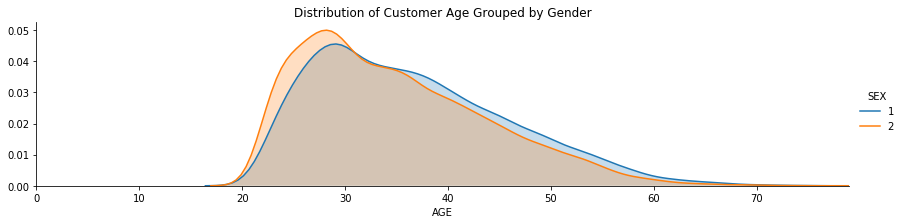

In [125]:
# KDE plot grouped by gender
fig = sns.FacetGrid(creditD, hue='SEX', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = creditD['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Gender')
fig.add_legend()

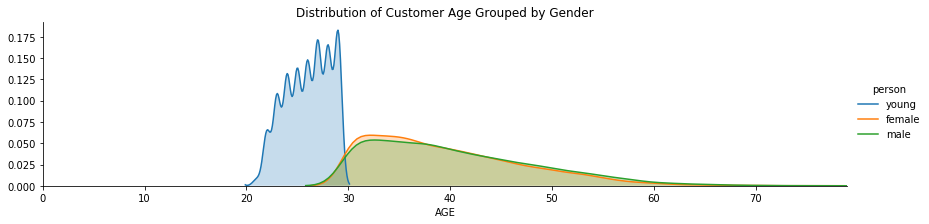

In [127]:
# include young adults
fig = sns.FacetGrid(creditD, hue='person', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = creditD['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Gender')
fig.add_legend()

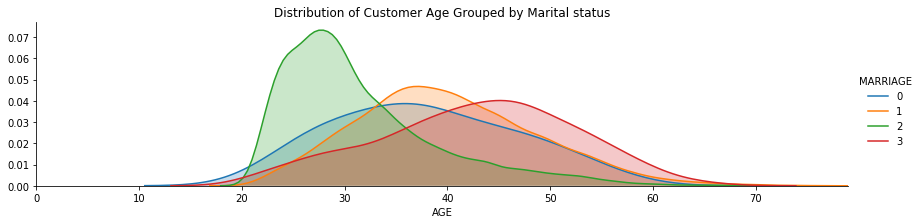

In [130]:
#Kde plot by Age and grouped by marital status
fig = sns.FacetGrid(creditD, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = creditD['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Marital status')
fig.add_legend()

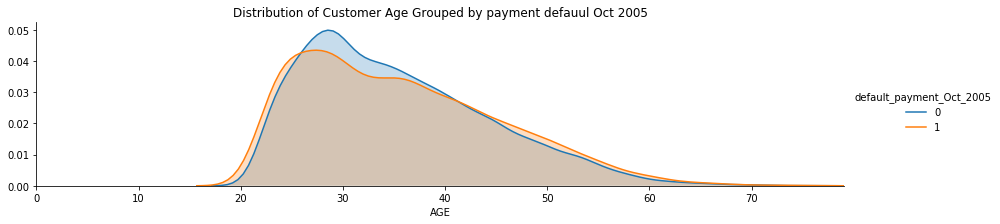

In [131]:
#kde plot by Age and grouped by default payment oct 2005
fig = sns.FacetGrid(creditD, hue='default_payment_Oct_2005', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = creditD['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by payment defauul Oct 2005')
fig.add_legend()

## Other factors that may be affecting default: Gender, Education, Marrital status

In [132]:
# add a column to data frame describing default as yes or no, 
creditD['default']=creditD.default_payment_Oct_2005.map({0:'no', 1:'yes'})

In [133]:
#add a column to data frame describing SEX. 1=Male, 2= female
creditD['GENDER']=creditD.SEX.map({1:'Male', 2:'female'})

In [134]:
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,young,yes,female
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,young,yes,female
2,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,female,no,female
3,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,female,no,female
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,male,no,Male


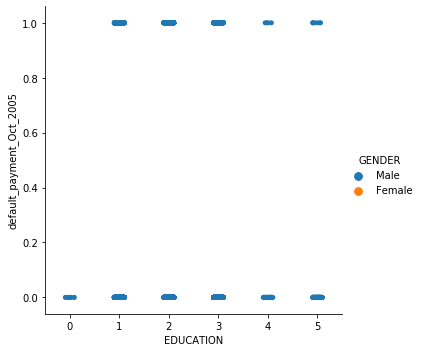

In [142]:
# plot Education Factor
sns.catplot('EDUCATION','default_payment_Oct_2005', hue='GENDER', data=creditD, order=range(0,6),
           hue_order = ['Male', 'Female'])

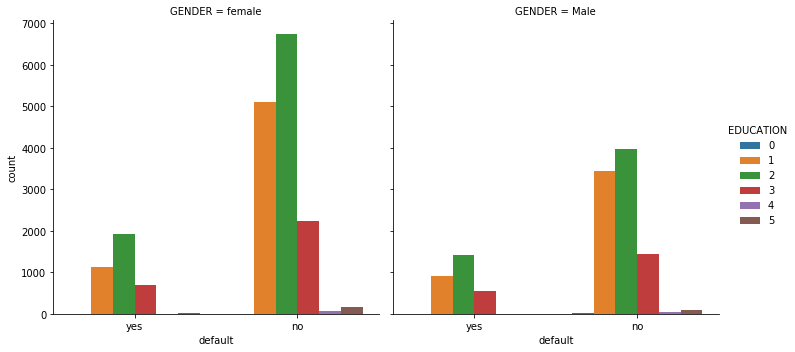

In [144]:
sns.catplot('default', data=creditD, hue='EDUCATION', kind='count', hue_order=range(0,6), col='GENDER')

### Look at Marrital status Factor

In [145]:
# add new column to creditD describing Marital status
creditD['Mstatus']=creditD.MARRIAGE.map({0:'other', 1:'married',2:'single',3:'divorce'})

In [146]:
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER,Mstatus
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,young,yes,female,married
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,young,yes,female,single
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,female,no,female,single
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,female,no,female,married
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,male,no,Male,married


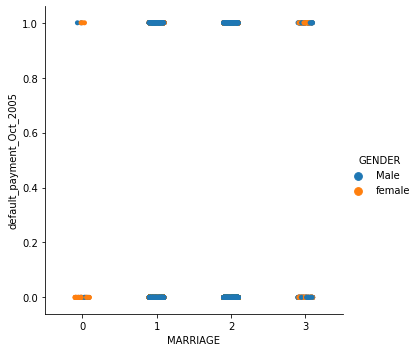

In [159]:
# plot defoult customers based on Marrital status and Gender
sns.catplot('MARRIAGE','default_payment_Oct_2005',hue='GENDER', data=creditD, order=range(0,4),
           hue_order = ['Male', 'female'])

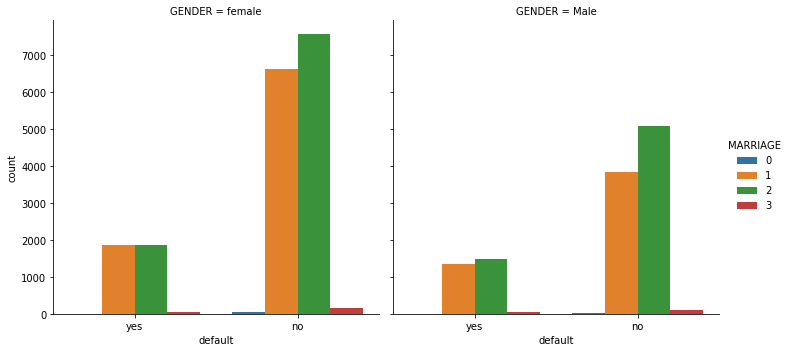

In [161]:
# plot the count of default customers based on Marrital status and Gender
sns.catplot('default', data=creditD, hue='MARRIAGE', kind='count', hue_order=range(0,4), col='GENDER')

## The Age factor on default payments

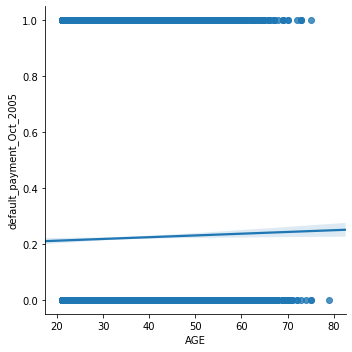

In [162]:
#plot a linear plot of customers in default in oct_2005
sns.lmplot('AGE','default_payment_Oct_2005', data=creditD)

### There seems to be a small but neglegible relationship between age and default status in the customers. It appears to be that the older the customer the more default that exists.

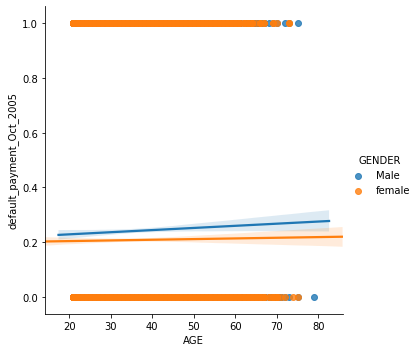

In [165]:
# linear plot of customers in default payment in Oct2005 by Age & gender
sns.lmplot('AGE', 'default_payment_Oct_2005', data=creditD, hue='GENDER', hue_order=['Male', 'female'])

### The plot shows that males of all ages have a slightly higher propensity to default a payment and that older males are more like ly to default than younger males.

In [167]:
# add new column to creditD describing Education level
creditD['EdLevel']=creditD.EDUCATION.map({0:'other', 1:'graduate school',2:'university',3:'high schoo', 4:'other',5:'other',6:'other'})

In [168]:
creditD.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER,Mstatus,EdLevel
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,young,yes,female,married,university
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,young,yes,female,single,university
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,female,no,female,single,university
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,female,no,female,married,university
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,male,no,Male,married,university


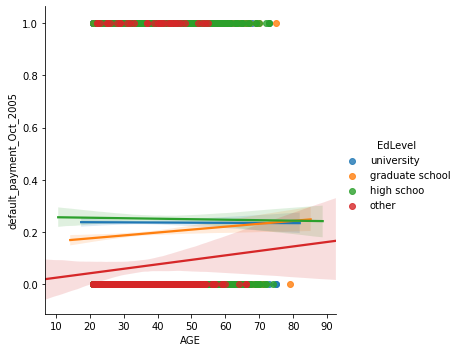

In [171]:
#  linear plot of customers in default Oct 2005 payment by  Age and grouped by education
sns.lmplot('AGE', 'default_payment_Oct_2005', hue='EdLevel', data=creditD)

### in college and high school educated customers the chance of default is higher than customers who attended graduate school. however, this changes as age reach approximatly 70. past 70 all three have the similar probability of defaulting

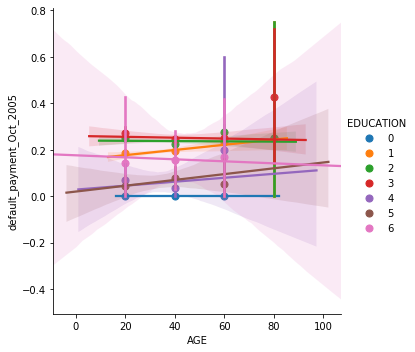

In [175]:
# Look at linear plot of customers who default in Oct 2005 by generation and education levels 
# first Create a generation bin
generations =[20,40,60,80]
sns.lmplot('AGE','default_payment_Oct_2005', hue='EDUCATION',data=creditD,x_bins=generations,
           hue_order=[0,1,2,3,4,5,6])

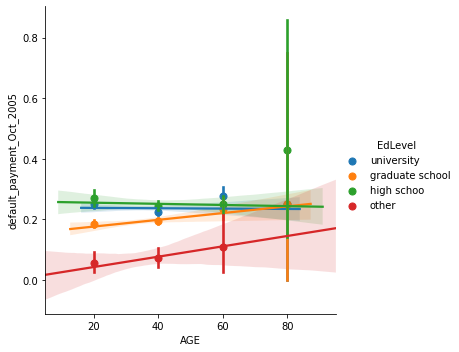

In [176]:
# to simplify the plot use the EdLevel feature created above to Look at linear plot of customers who 
# default in Oct 2005 by generation and education levels 
# first Create a generation bin
generations =[20,40,60,80]
sns.lmplot('AGE','default_payment_Oct_2005', hue='EdLevel',data=creditD,x_bins=generations)
           

### The plot suggests that the older generation of high school level customers have a higher default propensity.

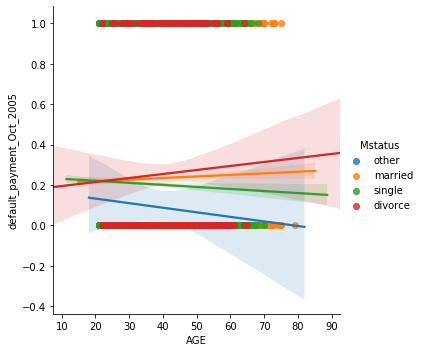

In [177]:
# look at customers who default Oct 2005 payment by Age grouped and Marital status
sns.lmplot('AGE','default_payment_Oct_2005', hue='Mstatus',data=creditD,
           hue_order=['other','married','single','divorce'])

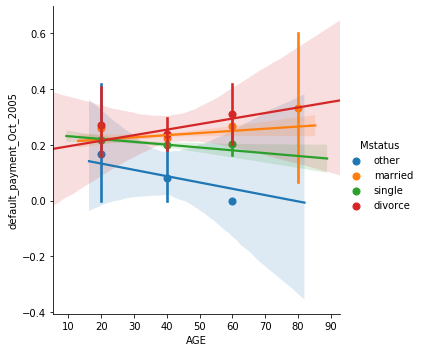

In [178]:
#  look at customers who default Oct 2005 payment by Age grouped and Marital status and apply 
# generation bins created above.
sns.lmplot('AGE','default_payment_Oct_2005', hue='Mstatus',data=creditD,x_bins=generations,
           hue_order=['other','married','single','divorce'])

### There appears to be an increase in default propensity with age and divorce. Additionally a drecrease in in default with age and singles and other marital status.

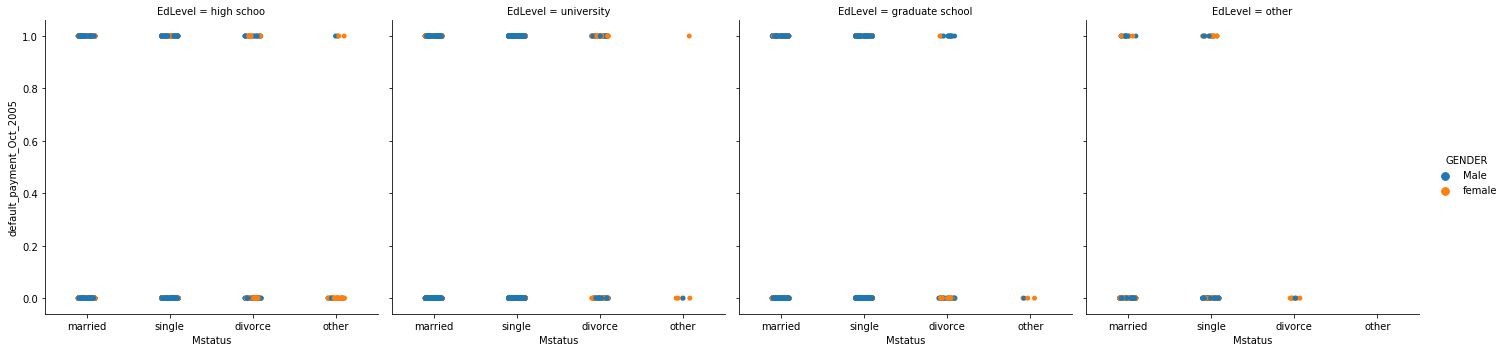

In [181]:
# look at customers who default in oct 2005 by marital status and gender and grouped by Education levels

sns.catplot('Mstatus','default_payment_Oct_2005', data=creditD, hue='GENDER', 
            hue_order=['Male', 'female'], col='EdLevel',col_order=['high schoo', 'university', 'graduate school','other'])

In [182]:
# create csv file of data frame 
creditD.to_csv("creditD.csv", sep=',')